### **Descarga e importe de bibliotecas**

In [1]:
%%capture
# Instalar y actualizar bibliotecas necesarias
!pip install kagglehub
!pip install roboflow
!pip install ultralytics

# Importar bibliotecas a usar
import os
import yaml
import random
import shutil
import kagglehub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from roboflow import Roboflow
from ultralytics import YOLO

### **Descarga y acondicionamiento de la base de datos de semillas**

In [2]:
# Descargar repositorio de aisladores
rf = Roboflow(api_key="3ioUIbqERJ2jEWElELQN")
project = rf.workspace("gcpds-tm2ae").project("seed-detection-edge")
version = project.version(2)
dataset = version.download("yolov11")
!mkdir datasets
!mv ./Seed-Detection-Edge-2 ./datasets

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Seed-Detection-Edge-2 in yolov11:: 100%|██████████| 6476/6476 [00:00<00:00, 7270.18it/s]


In [3]:
# Creación del directorio de las partes de la base de datos
data = {
    'path': './Seed-Detection-Edge-2',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 2,
    'names': ['Germinated', 'No_germinated'],
    'roboflow': {
        'license': 'CC BY 4.0',
        'project': 'seed-detection-smrzf',
        'url': 'https://universe.roboflow.com/gcpds-tm2ae/seed-detection-edge/dataset/2',
        'version': '2',
        'workspace': 'gcpds-tm2ae'}
}

# Especificar el directorio del archivo
file_path = './datasets/Seed-Detection-Edge-2/data.yaml'

# Escribir la información sobre el archivo YAML
with open(file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

### **Descarga del modelo entrenado e inferencia en imagen de evaluación**

In [4]:
# Descargar el modelo
model_path = kagglehub.model_download("lucasiturriago/yolov11m-seeds/pyTorch/segmentation")

# Especificar la carpeta de destino
output_folder = "./models"
os.makedirs(output_folder, exist_ok=True)

# Mover el modelo a la carpeta de destino
shutil.copy(model_path+'/yolo11m-seeds-seg.pt', output_folder)

'./models/yolo11m-seeds-seg.pt'

In [5]:
# Cargar YOLOv11 para segmentación de semillas

# Carga de modelo preentrenado
model = YOLO('./models/yolo11m-seeds-seg.pt')

In [9]:
# Ruta de la carpeta con las imágenes
image_folder_path = './datasets/Seed-Detection-Edge-2/test/images'

# Listar las imágenes de evaluación
image_paths = [os.path.join(image_folder_path, img) for img in os.listdir(image_folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Seleccionar una imagen al azar
imagen_dir = image_paths[random.randint(0, len(image_paths)-1)]

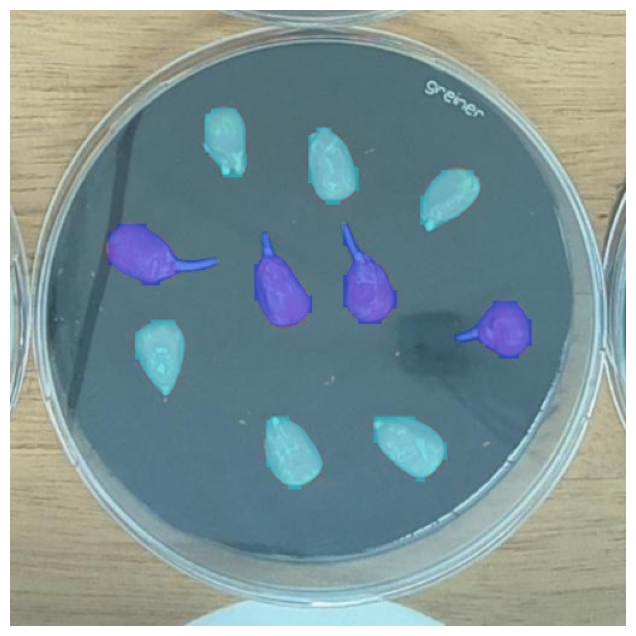

In [10]:
# Borrar resultados anteriores en caso de que existan
if os.path.exists('./runs/segment/predict'):
    shutil.rmtree('./runs/segment/predict')

# Realizar inferencia
result = model.predict(imagen_dir, save=True, imgsz=640, conf=0.4, show_boxes=False, show_labels=True)

# Ruta de la imagen con la inferencia del modelo
image_path = "./runs/segment/predict/"+imagen_dir.rsplit('/', 1)[-1]

# Cargar la imagen
image = mpimg.imread(image_path)

# Mostrar la imagen
plt.figure(figsize=(10, 8)) 
plt.imshow(image)
plt.axis('off')
plt.show()